<a href="https://colab.research.google.com/github/KimJunGu9/ADP_ML/blob/main/3_4_RandomForest(%EB%B6%84%EB%A5%98).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 분류의 경우

# sklearn.ensemble.RandomForestClassifier(...)

In [ ]:
# n_estimators : RandomForest에서 나무의 수 (int, default = 100)
# criterion : 분할의 품질을 측정하는 방법 ({“gini”, “entropy”}, default=”gini”)
# max_depth : 나무의 최대 깊이. (int, default = None)
#         None이면 모든 잎이 순수하거나 잎에 min_sample_split 미만의 샘플만 존재할 때까지 노드 확장
# min_samples_split : 내부 노드를 분할하는 데 필요한 최소 샘플 수 (int or float, default=2)
# min_samples_leaf : 리프 노드에 있어야하는 최소 샘플 수 (int or float, default=1)
# max_leaf_nodes : 리프 노드의 최대 개수 (int, default = None)
#            None이면 리프 노드 수에 제한이 없음
# bootstrap : 나무를 만들 때 부트 스트랩 샘플이 사용되는지 여부 (bool, default=True)
#       False이면 전체 데이터 세트가 각 트리를 작성하는 데 사용
# oob_score : 정확도 측정을 위해 out-of-bag 샘플을 사용할지 여부 (bool, default=False)

In [1]:
import pandas as pd 
import numpy as np 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
credit = pd.read_csv('/content/drive/MyDrive/ADP/Part.2/1. 통계분석/data/data/credit_final.csv')

In [4]:
from sklearn.model_selection import train_test_split

X = credit[credit.columns.difference(['credit.rating'])]
y = credit['credit.rating']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=321)
X_train.head()

,account.balance,age,apartment.type,bank.credits,credit.amount,credit.duration.months,credit.purpose,current.assets,dependents,employment.duration,foreign.worker,guarantor,installment.rate,marital.status,occupation,other.credits,previous.credit.payment.status,residence.duration,savings,telephone
133,3,26,2,1,1453,18,3,1,1,1,1,1,3,1,3,2,2,1,1,1
464,2,24,1,1,7472,12,4,1,1,1,1,1,1,1,1,2,2,2,4,1
919,1,46,3,2,6331,48,1,4,1,4,1,1,4,3,3,2,3,4,1,2
865,3,39,3,2,1271,15,3,4,1,2,1,1,3,3,3,2,3,4,4,2
352,3,46,2,2,7629,48,4,3,2,4,1,1,4,1,4,1,3,2,4,1


In [6]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [12]:
print("정확도 : ", clf.score(X_test, y_test))

# score 값은 회귀분석에서는 중요한 수치지만 분류분석에서는 절대적인 지표가 될 수없다.
# 그래서 분류분석에서는 다른 지표를 사용함 -> f1스코어, roc_auc와 같은 평가지표를 사용해야 함

정확도 :  0.76


In [8]:
from sklearn.metrics import confusion_matrix # 오차행렬
# 정밀도, 재현율, F1 스코어 : f1_score(test_y, pred)로 사용

from sklearn.metrics import precision_score, recall_score, f1_score 

In [9]:
print(f"정밀도 : {precision_score(y_test, y_pred)}")
print(f"재현율 : {recall_score(y_test, y_pred)}")
print(f"F1 스코어 : {f1_score(y_test, y_pred)}")

정밀도 : 0.7695473251028807
재현율 : 0.9211822660098522
F1 스코어 : 0.8385650224215246


In [10]:
# 오차행렬

pd.DataFrame(confusion_matrix(y_test, y_pred),
             index=['True[0]', 'True[1]'],
             columns=['Pred[0]','Pred[1]'])

,Pred[0],Pred[1]
True[0],41,56
True[1],16,187


In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve

plot_roc_curve(clf, X_test, y_test)
plt.show()

ImportError: ignored

In [14]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [15]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':range(2,10,2) , 'min_samples_leaf':range(2,10,2)}

model_grid_rf = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
model_grid_rf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(2, 10, 2),
                         'min_samples_leaf': range(2, 10, 2)})

In [16]:
model_grid_rf.best_estimator_.estimators_

[DecisionTreeClassifier(max_depth=6, max_features='sqrt', min_samples_leaf=2,
                        random_state=1447131249),
 DecisionTreeClassifier(max_depth=6, max_features='sqrt', min_samples_leaf=2,
                        random_state=1556514865),
 DecisionTreeClassifier(max_depth=6, max_features='sqrt', min_samples_leaf=2,
                        random_state=211746828),
 DecisionTreeClassifier(max_depth=6, max_features='sqrt', min_samples_leaf=2,
                        random_state=95665473),
 DecisionTreeClassifier(max_depth=6, max_features='sqrt', min_samples_leaf=2,
                        random_state=333073710),
 DecisionTreeClassifier(max_depth=6, max_features='sqrt', min_samples_leaf=2,
                        random_state=1604844455),
 DecisionTreeClassifier(max_depth=6, max_features='sqrt', min_samples_leaf=2,
                        random_state=1323582590),
 DecisionTreeClassifier(max_depth=6, max_features='sqrt', min_samples_leaf=2,
                        random

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve

plot_roc_curve(model_grid_rf.best_estimator_, X_test, y_test)
plt.show()

ImportError: ignored

In [17]:
# 변수의 중요도 확인

importances = pd.DataFrame(np.mean([tree.feature_importances_ for tree in model_grid_rf.best_estimator_.estimators_], axis=0))

feature_importances = pd.concat([pd.DataFrame(X.columns), importances], axis=1)
feature_importances.columns=["col_name","feature_importance"]

feature_importances = feature_importances.sort_values(by="feature_importance",ascending=False).reset_index(drop=True)
feature_importances

,col_name,feature_importance
0,account.balance,0.159519
1,credit.duration.months,0.127698
2,credit.amount,0.123575
3,previous.credit.payment.status,0.093202
4,age,0.079930
5,savings,0.062511
6,current.assets,0.054553
7,credit.purpose,0.047548
8,employment.duration,0.040319
9,installment.rate,0.032857


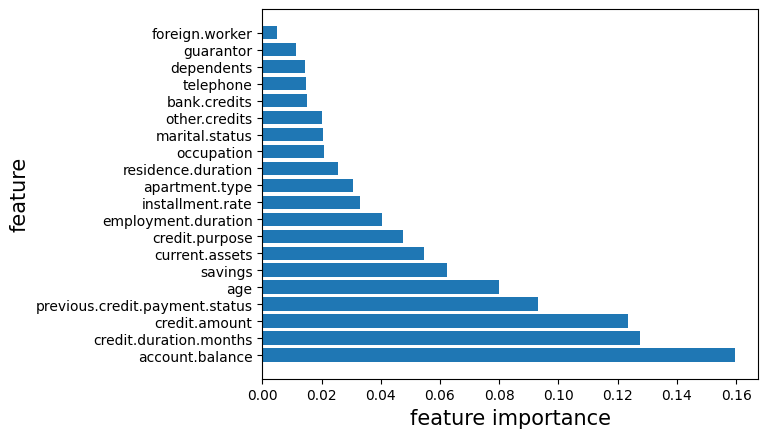

In [18]:
import matplotlib.pyplot as plt


plt.barh(feature_importances["col_name"], feature_importances["feature_importance"], align='center')

plt.xlabel('feature importance', size=15)

plt.ylabel('feature', size=15)

plt.show()

In [ ]:
# age가 bagging에서는 4위에 랭크되어있었는데 여기에서는 순서가 바뀌었다.
# 그래서 이렇게 랜덤포레스트로 확인하면 편향된 데이터나 분산을 최소화해줌으로써 어떠한 데이터들의 feature_importance도 순서가 바뀔 수가 있다.
# 그래서 더 정확하게 best_estimator 안에 있는 feature_importance를 탐색을 해줄 수가 있다.

# 변수가 많을 경우에는 랜덤포레스트는 더 강력해진다